# Exercises 10

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit #non so se queste ultime due servono
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

## Exercise 10.1 - American Capitals

###  <span style="color:green"> Single core </span>

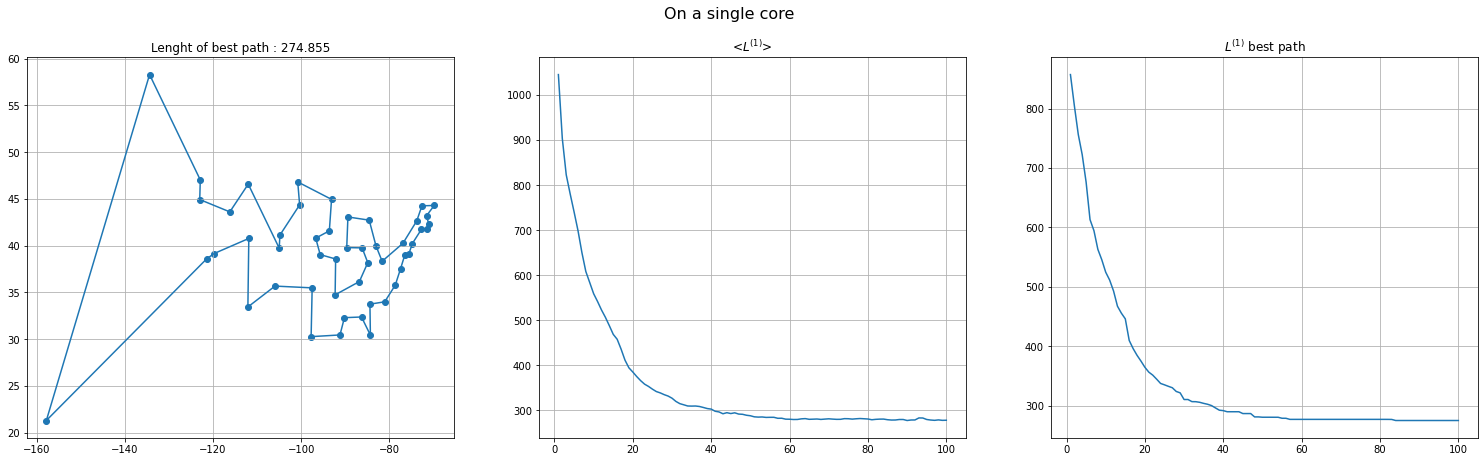

In [2]:
path = "American_capitals.dat"
x, y = np.loadtxt(path, usecols=(2,3), unpack='true')
path = "single/final.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)

fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 7))

fig.suptitle("On a single core", size =16)

ax1.scatter(x,y)
ax1.plot(x1,y1)
ax1.grid()
ax1.set_title("Lenght of best path : " + str(L))

path = "single/ave_path.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax2.plot(x,y)
ax2.grid()
ax2.set_title("<$L^{(1)}$>")

path = "single/best.out"
x, y = np.loadtxt(path, usecols=(0, 1), unpack='true')

ax3.plot(x,y)
ax3.grid()
ax3.set_title("$L^{(1)}$ best path")


plt.show()

This was done using almost exactly the same code of the previous exercises: I changed only the file from which we read the best path. 

<span style="color:orange"> <b>Re-running the following code will start a brief animation  that shows how the shortest path changes in time</b>. </span>

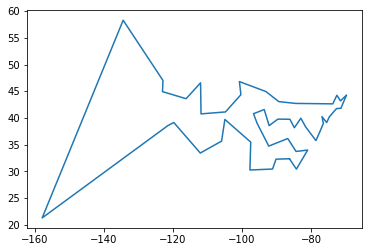

In [3]:
plt.figure()

for i in range(71):
    path = "single/path"+str(i)+".out"
    x,y=np.loadtxt(path, usecols=(1, 2), unpack='true', skiprows=1)
    plt.plot(x,y)
    plt.show()
    sleep(0.1)
    clear_output(wait=True)
    
plt.show()

###  <span style="color:green"> Using MPI </span>

#### Using 8 Core that DO NOT communicate

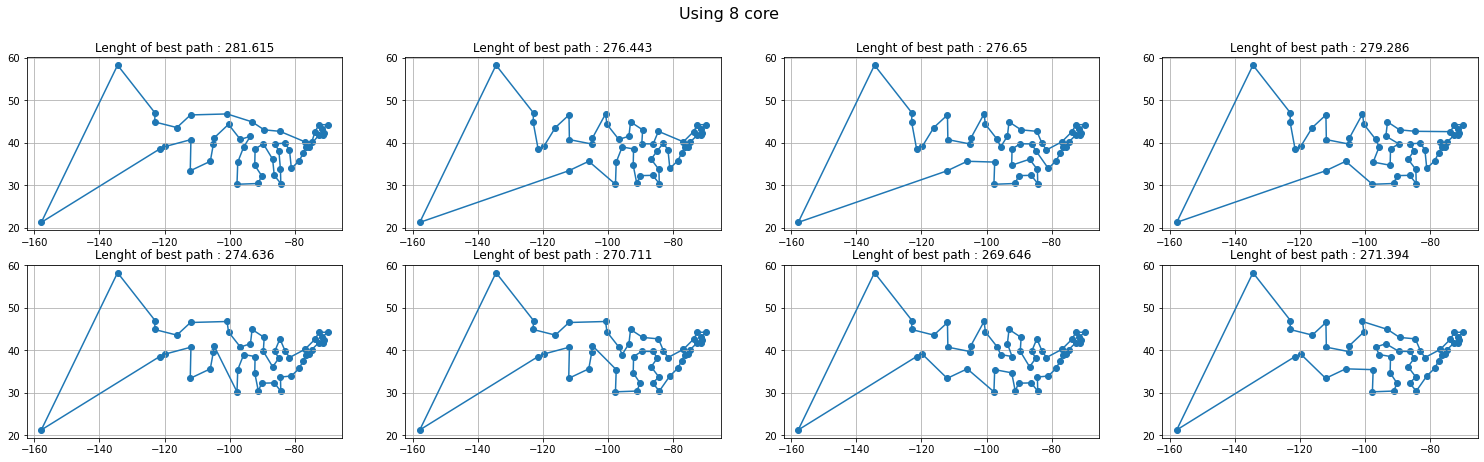

In [4]:
path = "American_capitals.dat"
x, y = np.loadtxt(path, usecols=(2,3), unpack='true')

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))=plt.subplots(2,4,  figsize=(26, 7))

fig.suptitle("Using 8 core", size =16)

path = "MPI/non_parlandosi/final0.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax1.scatter(x,y)
ax1.plot(x1,y1)
ax1.grid()
ax1.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final1.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax2.scatter(x,y)
ax2.plot(x1,y1)
ax2.grid()
ax2.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final2.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax3.scatter(x,y)
ax3.plot(x1,y1)
ax3.grid()
ax3.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final3.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax4.scatter(x,y)
ax4.plot(x1,y1)
ax4.grid()
ax4.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final4.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax5.scatter(x,y)
ax5.plot(x1,y1)
ax5.grid()
ax5.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final5.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax6.scatter(x,y)
ax6.plot(x1,y1)
ax6.grid()
ax6.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final6.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax7.scatter(x,y)
ax7.plot(x1,y1)
ax7.grid()
ax7.set_title("Lenght of best path : " + str(L))

path = "MPI/non_parlandosi/final7.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax8.scatter(x,y)
ax8.plot(x1,y1)
ax8.grid()
ax8.set_title("Lenght of best path : " + str(L))

plt.show()

The result obtained using only a single core falls nearly in the middle: some core used a starting seed for the random generator that gave birth to a first generation that proved to be slightly more efficient and some to a first generation that proved to be slightly less efficient. All this fluctuations can be accountent simply to stastistical uncertanties.

#### Using 8 Core that DO communicate

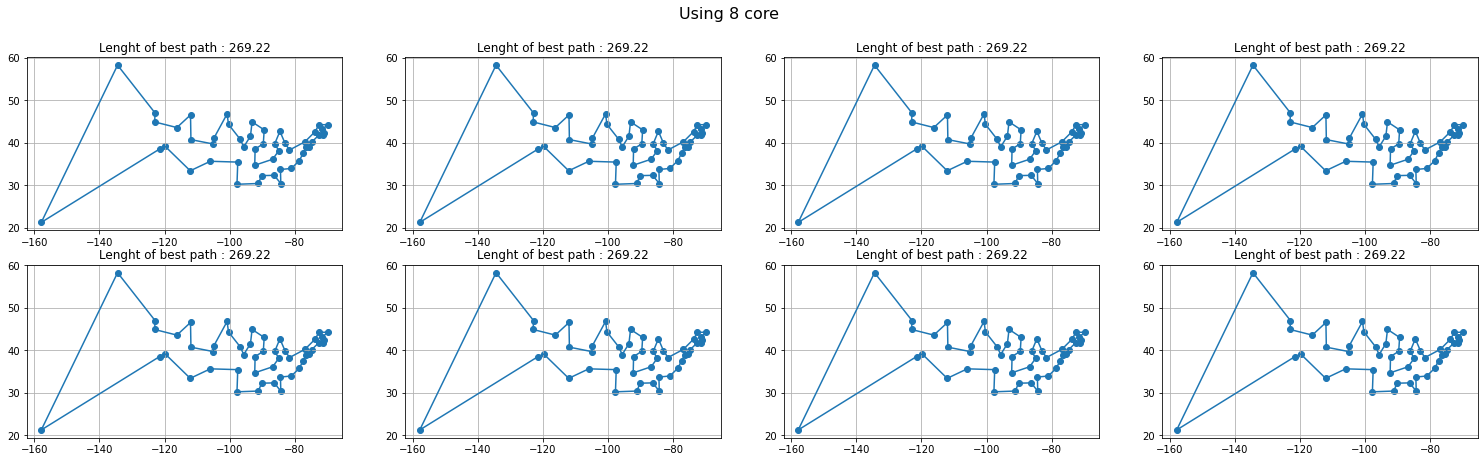

In [7]:
path = "American_capitals.dat"
x, y = np.loadtxt(path, usecols=(2,3), unpack='true')

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))=plt.subplots(2,4,  figsize=(26, 7))

fig.suptitle("Using 8 core", size =16)

path = "MPI/parlandosi/final0.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax1.scatter(x,y)
ax1.plot(x1,y1)
ax1.grid()
ax1.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final1.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax2.scatter(x,y)
ax2.plot(x1,y1)
ax2.grid()
ax2.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final2.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax3.scatter(x,y)
ax3.plot(x1,y1)
ax3.grid()
ax3.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final3.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax4.scatter(x,y)
ax4.plot(x1,y1)
ax4.grid()
ax4.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final4.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax5.scatter(x,y)
ax5.plot(x1,y1)
ax5.grid()
ax5.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final5.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax6.scatter(x,y)
ax6.plot(x1,y1)
ax6.grid()
ax6.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final6.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax7.scatter(x,y)
ax7.plot(x1,y1)
ax7.grid()
ax7.set_title("Lenght of best path : " + str(L))

path = "MPI/parlandosi/final7.out"
L=np.loadtxt(path, usecols=(0), unpack='true', max_rows=1)
a1,x1, y1 = np.loadtxt(path, usecols=(0, 1, 2), unpack='true', skiprows=1)
ax8.scatter(x,y)
ax8.plot(x1,y1)
ax8.grid()
ax8.set_title("Lenght of best path : " + str(L))

plt.show()

This was done over 200 generations. Letting them exchange their best in pairs every 20 generations. I increased the number of generation to let every single core arrive to the best solution. 

It is obvious why using the MPI libraries really does improve the algorithm: even in a fairly simple problem as this, the result obtained when every core can communicate with one another is the shorter than all of the path that can be reached by not allowing each core to communicate.